In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [8]:
# Finding the calibration constant using a known lambda

# CONSTANTS and INPUTS:
LAMBDA = 560 * 1e-6 # Known wavelength of laser; in mm
d_prime = np.array([20, 30, 40]) # Micrometer reading in mm
N = np.array([100,200,300]) # Number of fringes collapsed

u_d_prime = 0.01 # Least Count of Micrometer in mm
u_N = 1 # Uncertainty in counting the number of fringes

def calibration(LAMBDA, d_prime, N):
    '''
    LAMBDA is the known wavelength of laser, check the laser module
    d_prime is the micrometer reading
    N is the number of fringes collapsed
    '''

    d = (N * LAMBDA) / 2
    return d / d_prime

def calib_uncert(d_prime, N, delta_mean, u_d_prime, u_N):
    '''
    u_Delta / Delta = sqrt( (u_N/N)^2 + (u_d'/d')^2 )
    '''

    frac_N = u_N / N
    frac_d_prime = u_d_prime / d_prime
    
    total_frac_error = np.sqrt(frac_N**2 + frac_d_prime**2)
    
    abs_error = delta_mean * total_frac_error
    return abs_error

Deltas = calibration(LAMBDA, d_prime, N)

mean_delta = np.mean(Deltas)
std_dev_delta = np.std(Deltas, ddof=1)
sem_delta = std_dev_delta / np.sqrt(len(Deltas))

avg_d_prime = np.mean(d_prime)
avg_N = np.mean(N)

uncert_delta = calib_uncert(
    avg_d_prime, avg_N, mean_delta, u_d_prime, u_N
)

print(f"Calculated Deltas: \n{Deltas}")
print(f"Mean Delta: {mean_delta:.4f}")
print(f"Standard Deviation: {std_dev_delta:.4f}")
print(f"SEM: {sem_delta:.4f}")
print(f"Uncertainty: {uncert_delta:.4f}")

Calculated Deltas: 
[0.0014     0.00186667 0.0021    ]
Mean Delta: 0.0018
Standard Deviation: 0.0004
SEM: 0.0002
Uncertainty: 0.0000


In [ ]:
# Finding the wavelength of laser beam

# CONSTANTS and INPUTS:
d = np.array([...]) # input in mm bro
N = np.array([...])                
delta = np.mean(Deltas)
least_count = ... # Least count of micrometer (mm)
uncertainty_N = ... # Counting uncertainty, idk what it would be

def calc_lambda(d, N, delta): 
    '''
    d is displacement of mirror for N fringes (mm)
    N is number of fringes counted
    delta is calibration constant of micrometer, idk wtf it is
    '''
    
    Lambda = ((2 * d) * delta) / N 
    return Lambda
                                       
WL = calc_lambda(d, N, delta)

mean_wl = np.mean(WL)
std_dev = np.std(WL, ddof=1) 
standard_error = std_dev / np.sqrt(len(WL)) # Standard Error of the Mean

avg_d = np.mean(d)
avg_N = np.mean(N)

frac_error_d = least_count / avg_d
frac_error_N = uncertainty_N / avg_N

total_frac_error = np.sqrt(frac_error_d**2 + frac_error_N**2)
uncertainty = mean_wl * total_frac_error

print(f"Calculated Wavelengths in mm: \n{WL}")
print(f"Mean Wavelength: {mean_wl:.7f} mm")
print(f"Std Dev: {std_dev:.7f} mm")
print(f"SE: {standard_error:.7f} mm")
print(f"Uncertainty: {uncertainty:.7f} mm")

In [ ]:
# Thickness of glass - take 3 measurements:
Thick = np.array([...]) # in mm again bro

print(f"Mean Thickness: {np.mean(Thick):.3f}")
print(f"Std Dev Thickness: {np.std(Thick, ddof = 1):.3f}")

In [ ]:
# Finding the Refractive Index of Glass Material

# CONSTANTS and INPUTS
T = np.mean(Thick) # Thickness of glass in mm again bro
N_glass = np.array([...]) # Fringes shifted
theta_glass = np.array([...]) # Angle in degrees
                                    
least_count_T = ... # Micrometer least count (mm)
least_count_theta = ... # Angle least count (degrees)
uncertainty_N = ...

def calc_ri(T, N, theta_deg, WL): 
    '''
    T is thickness of glass slide (mm)
    N is number of fringes shifted
    theta_deg is rotation angle in degrees
    WL is  wavelength of laser (mm)
    '''
    
    theta_rad = np.radians(theta_deg)
    
    X = 1 - np.cos(theta_rad)
    
    numerator = ((2 * T) - (N * WL)) * X
    denominator = (2 * T * X) - (N * WL)
    
    return numerator / denominator

def calc_uncert(T, N, theta_deg, WL, u_T, u_N, u_theta_deg):
    
    theta_rad = np.radians(theta_deg)
    u_theta_rad = np.radians(u_theta_deg)
    
    X = 1 - np.cos(theta_rad)
    D = (2 * T * X) - (N * WL) 
    
    deriv_N = (2 * T * WL * X * np.cos(theta_rad)) / (D**2)
    err_N = deriv_N * u_N
    
    deriv_T = (-2 * N * WL * X * np.cos(theta_rad)) / (D**2)
    err_T = deriv_T * u_T
    
    deriv_Theta = (-N * WL * (2 * T - N * WL) * np.sin(theta_rad)) / (D**2)
    err_Theta = deriv_Theta * u_theta_rad
    
    return np.sqrt(err_N**2 + err_T**2 + err_Theta**2)

RI_M = calc_ri(T, N_glass, theta_glass, mean_wl)

mean_ri = np.mean(RI_M)
std_dev_ri = np.std(RI_M, ddof=1)
standard_error_ri = std_dev_ri / np.sqrt(len(RI_M))

avg_N_glass = np.mean(N_glass)
avg_theta_glass = np.mean(theta_glass)

uncertainty_ri = calc_uncert(
    T, avg_N_glass, avg_theta_glass, mean_wl, 
    least_count_T, uncertainty_N, least_count_theta
)

print(f"Calculated Refractive Indices: \n{RI_M}")
print(f"Mean Refractive Index: {mean_ri:.4f}")
print(f"Std Dev: {std_dev_ri:.4f}")
print(f"SE: {standard_error_ri:.4f}")
print(f"Uncertainty: {uncertainty_ri:.4f}")

RI of Air from observations: [1.0001748 1.0001748 1.0002185 1.0002185 1.0001748 1.0001748]
Mean RI: 1.00019
Standard Deviation: 0.00002
SEM: 0.00001
Uncertainty: 0.00004
Slope: -9.0182
R-Squared: 0.9984
Refractive Index of air: 1.0001938


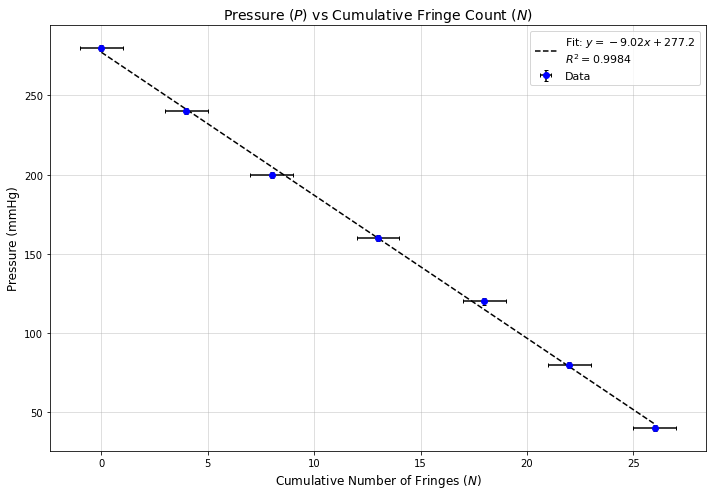

In [7]:
# RI of Air from Pressure reading

# CONSTANTS and INPUTS
D = 100.0 # Pressure Cell Length in mm
P_atm = 760.0 # Atmospheric Pressure (mmHg)
WL_m = 460e-6 

pressure_readings = np.array([280, 240, 200, 160, 120, 80, 40]) 
fringe_readings = np.array([0, 4, 8, 13, 18, 22, 26])

u_N = 1.0 # Counting uncertainty
u_D = 0.0 # Ruler uncertainty
u_P = 2.0 # Pressure gauge uncertainty

def calc_ri(pressure_readings, fringe_readings, D, P_atm, WL_m):
    '''
    pressure_readings is pressure readings
    fringe_readings is the cummulative number of fringes collapsed
    D is the length of pressure cell in mm
    P_atm is atmospheric pressure in mmHg
    WL_m is mean wavelength
    '''

    dP_steps = np.abs(np.diff(pressure_readings))
    dN_steps = np.abs(np.diff(fringe_readings))
    
    return 1 + (dN_steps * WL_m * P_atm) / (2 * D * dP_steps)

ri_air = calc_ri(pressure_readings, fringe_readings, D, P_atm, WL_m)

mean_ri = np.mean(ri_air)
std_dev = np.std(ri_air, ddof=1)
sem = std_dev / np.sqrt(len(ri_air))

dP_steps = np.abs(np.diff(pressure_readings))
dN_steps = np.abs(np.diff(fringe_readings))

avg_dN = np.mean(dN_steps)
avg_dP = np.mean(dP_steps)

frac_error = np.sqrt((u_N/avg_dN)**2 + (u_D/D)**2 + (u_P/avg_dP)**2)
uncertainty = (mean_ri - 1) * frac_error

print(f"RI of Air from observations: {ri_air}")
print(f"Mean RI: {mean_ri:.5f}")
print(f"Standard Deviation: {std_dev:.5f}")
print(f"SEM: {sem:.5f}")
print(f"Uncertainty: {uncertainty:.5f}")

slope, intercept, r_value, p_value, std_err_slope = linregress(fringe_readings, pressure_readings)
r_squared = r_value**2

slope_mag = np.abs(slope)
n_slope = 1 + (1 / slope_mag) * (WL_m * P_atm) / (2 * D)

print(f"Slope: {slope:.4f}")
print(f"R-Squared: {r_squared:.4f}")
print(f"Refractive Index of air: {n_slope:.7f}")

plt.figure(figsize=(10, 7))

plt.errorbar(fringe_readings, pressure_readings, 
             yerr=u_P, xerr=u_N, 
             fmt='o', color='blue', ecolor='black', capsize=2, 
             label='Data', zorder=5)

fit_y = slope * fringe_readings + intercept
equation_str = f"Fit: $y = {slope:.2f}x + {intercept:.1f}$\n$R^2 = {r_squared:.4f}$"
plt.plot(fringe_readings, fit_y, color='black', linestyle='--', label=equation_str, zorder=4)

plt.title(r'Pressure ($P$) vs Cumulative Fringe Count ($N$)', fontsize=14)
plt.xlabel('Cumulative Number of Fringes ($N$)', fontsize=12)
plt.ylabel('Pressure (mmHg)', fontsize=12)
plt.grid(True, alpha=0.5)
plt.legend(loc='best', fontsize=11)
plt.tight_layout()
plt.show()